In questo notebook è contenuto parte del lavoro di tirocinio e tesi di Giorgio Olivieri per il corso di laurea magistrale in Ingegneria Gestionale "Digitalizzazione e analisi dell'informazione aziendale " UNIVPM

Di seguito si riportano le varie fasi dell'analisi di alcuni dei dataset indicati nei vari documenti.

CARICAMENTO DEI DATI

In questa prima parte i dataset vengono letti.Questi sono stati caricati nel Drive personale di google: per leggerli è necessario eseguire la seconda cella in modo da effettuare il montaggio del drive. In questo modo Colab potrà direttamente avere accesso

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pandas as pd
import numpy as np

In [2]:
#serve per effettuare il montaggio di google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#dal dataset reperibile al link: https://www.kaggle.com/datasets/bobaaayoung/electric-power-generation-datase
data = pd.read_excel('/content/drive/MyDrive/DatasetTesiTirocinio/electric_power_data.xlsx')

ANALISI ESPLORATIVA

In questa fase i dati vengono esploarati tramite varie tecniche di visualizzazione al fine da comprenderne meglio la struttura

In [ ]:
data.head()

datetime  Ua(V)  Ia(A)  P(kW)  TEMP(°C)  H(%)
0 2022-10-01 00:00:00  239.3   71.6  43.17      25.5  81.7
1 2022-10-01 00:05:00  239.4   73.8  47.09      25.5  81.8
2 2022-10-01 00:10:00  239.4   75.6  48.99      25.5  81.9
3 2022-10-01 00:15:00  239.5   65.8  41.01      25.5  82.1
4 2022-10-01 00:20:00  239.6   64.2  38.27      25.5  82.2

In [ ]:
data.describe()

datetime         Ua(V)         Ia(A)         P(kW)  \
count                24768  24768.000000  24768.000000  24768.000000   
mean   2022-11-12 23:57:30    237.933628    134.775412     86.531405   
min    2022-10-01 00:00:00    229.400000     13.000000     -6.880000   
25%    2022-10-22 11:58:45    236.500000     62.800000     39.020000   
50%    2022-11-12 23:57:30    238.200000     84.200000     54.890000   
75%    2022-12-04 11:56:15    239.300000    228.600000    142.985000   
max    2022-12-25 23:55:00    242.800000    552.000000    347.810000   
std                    NaN      1.853000    103.036004     68.008474   

           TEMP(°C)          H(%)  
count  24768.000000  24768.000000  
mean      17.373938     61.779583  
min        5.400000     23.200000  
25%       12.700000     53.000000  
50%       19.100000     62.800000  
75%       20.400000     72.100000  
max       29.100000     87.900000  
std        4.909975     13.137253

In [ ]:
data.isnull().sum()

datetime    0
Ua(V)       0
Ia(A)       0
P(kW)       0
TEMP(°C)    0
H(%)        0
dtype: int64

Text(0.5, 1.0, 'Pairplot delle  features ')

<Figure size 1200x600 with 0 Axes>

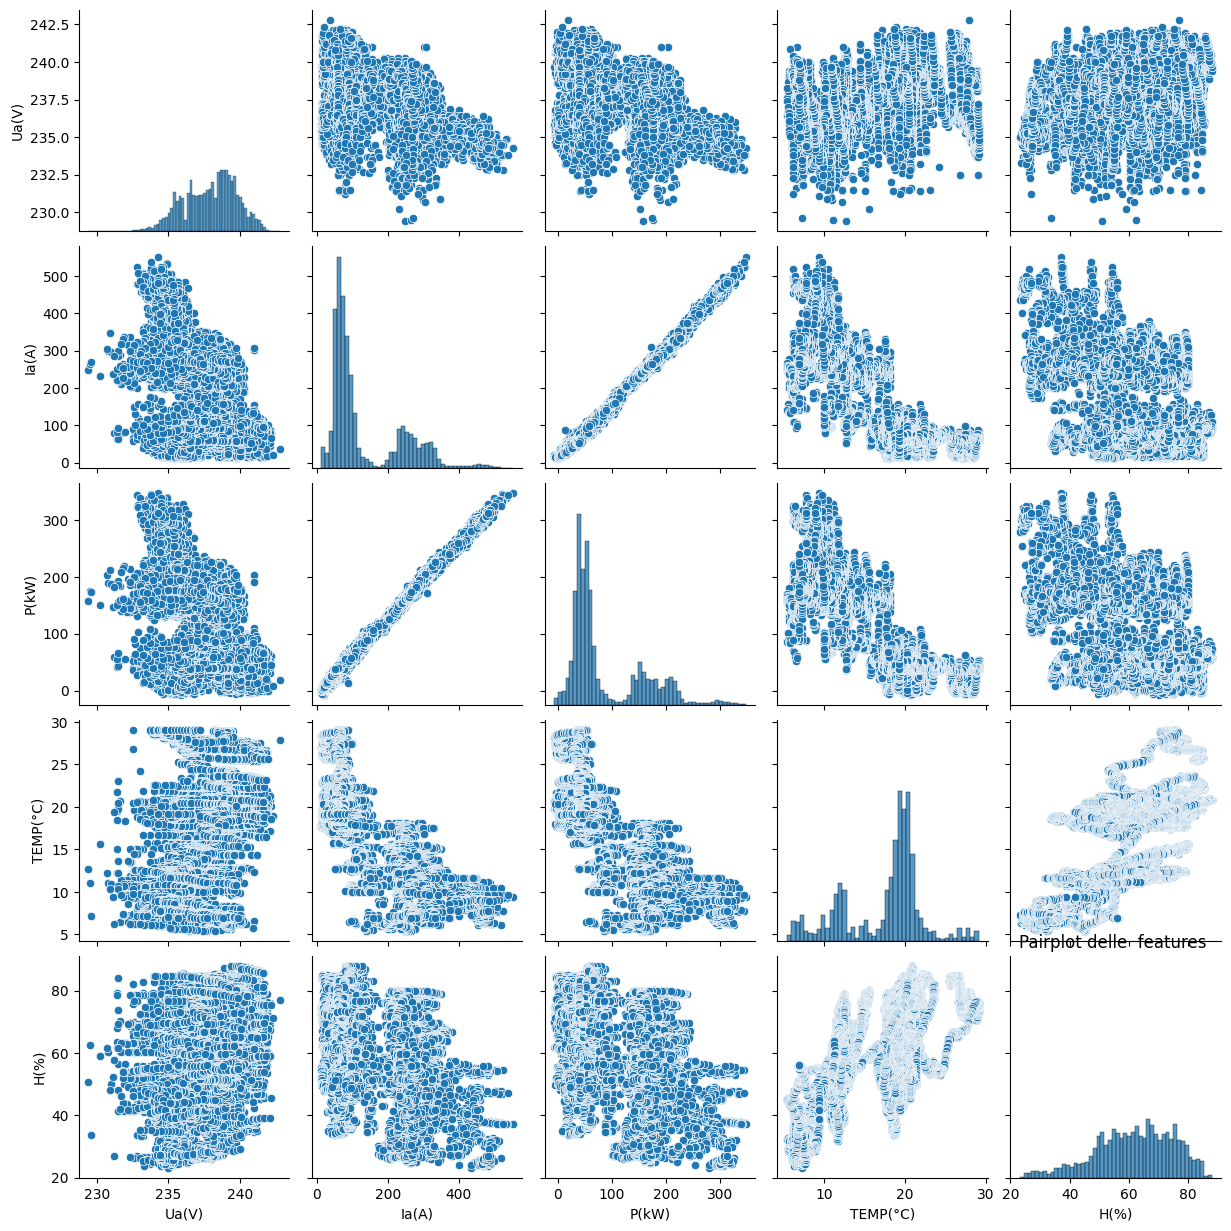

In [ ]:
plt.figure(figsize=(12, 6))
sns.pairplot(data=data)
plt.title('Pairplot delle  features ')

In [ ]:
correlation = data.drop(['datetime'], axis = 1).corr()
plt.figure(figsize=(16, 6))
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)
plt.title('Coefficiente di correlazione tra le feautures ', size=16)

Text(0.5, 1.0, 'Coefficiente di correlazione tra le feautures ')

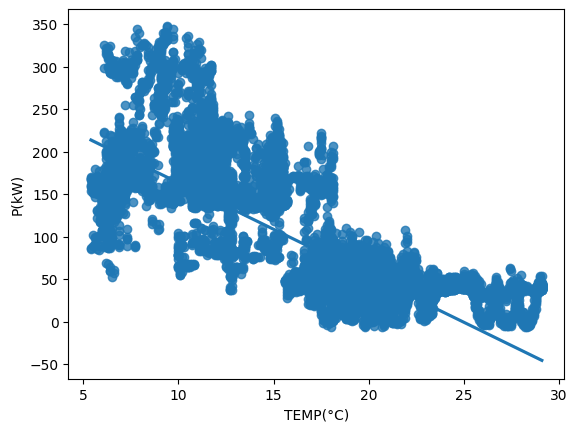

In [ ]:
ax = sns.regplot(x='TEMP(°C)', y='P(kW)', data=data, robust=True)

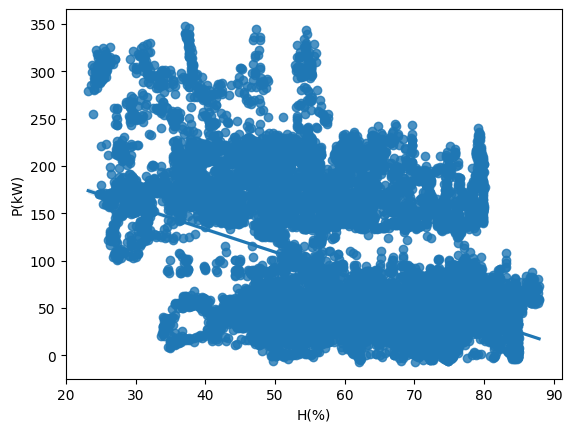

In [ ]:
ax = sns.regplot(x='H(%)', y='P(kW)', data=data, robust=True)

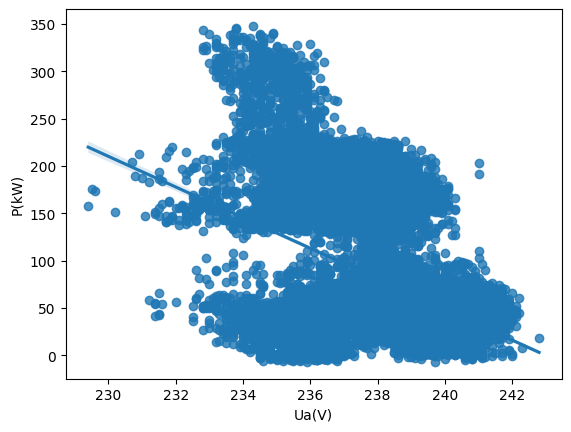

In [ ]:
ax = sns.regplot(x='Ua(V)', y='P(kW)', data=data, robust=True)

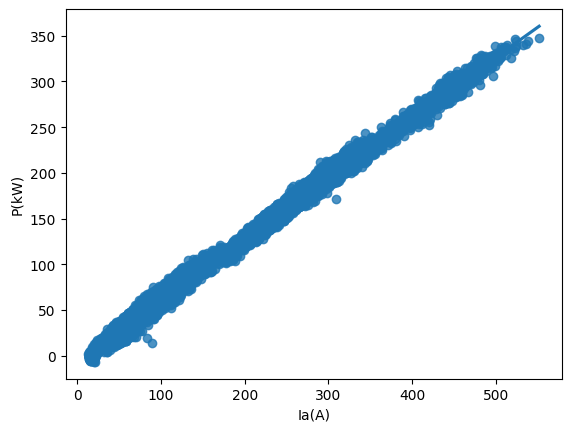

In [ ]:
ax = sns.regplot(x='Ia(A)', y='P(kW)', data=data, robust=True)

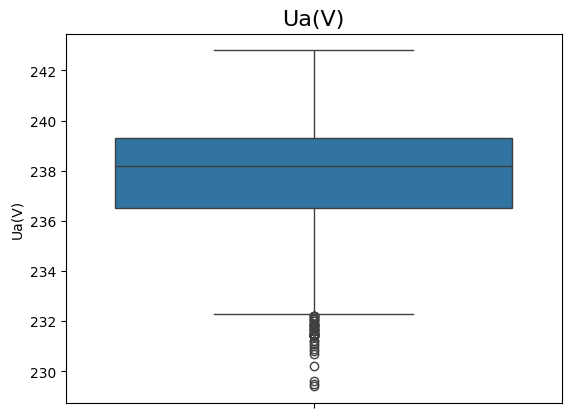

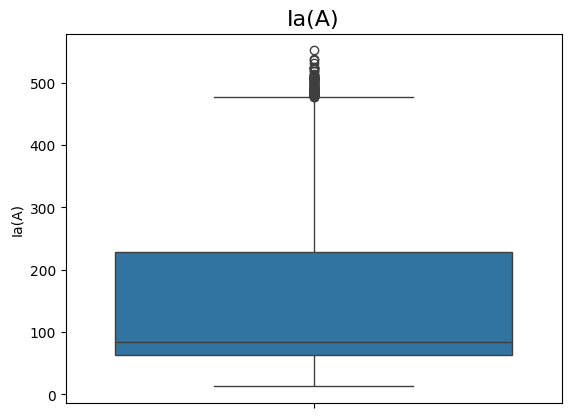

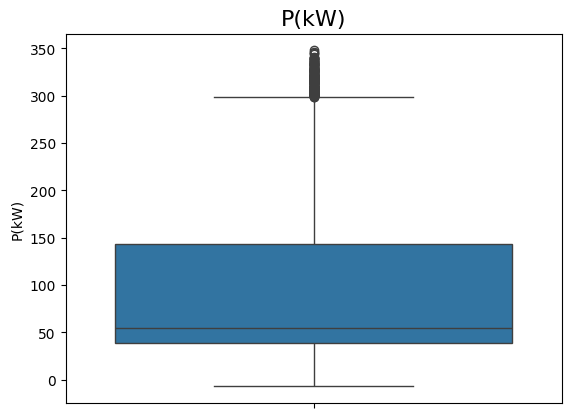

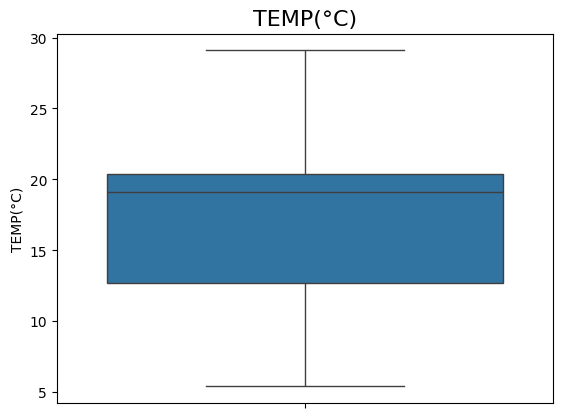

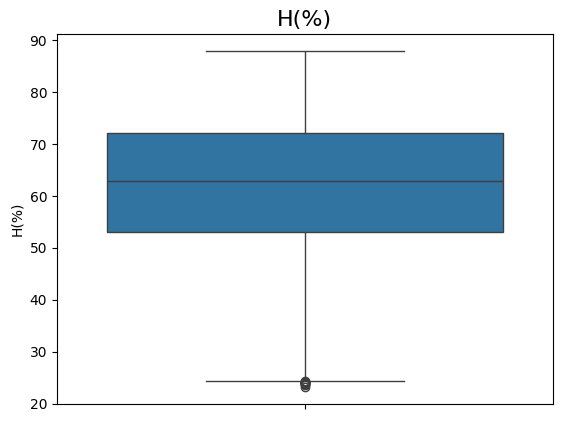

In [ ]:
#boxplot
for col in data.columns:
    if col != 'datetime':  #questo perchè non mi interessa la distribuzione di questo tipo di dato
       box_plot  = plt.subplots()
       box_plot = sns.boxplot(data[col])
       plt.title(col, size=16)
       plt.show()

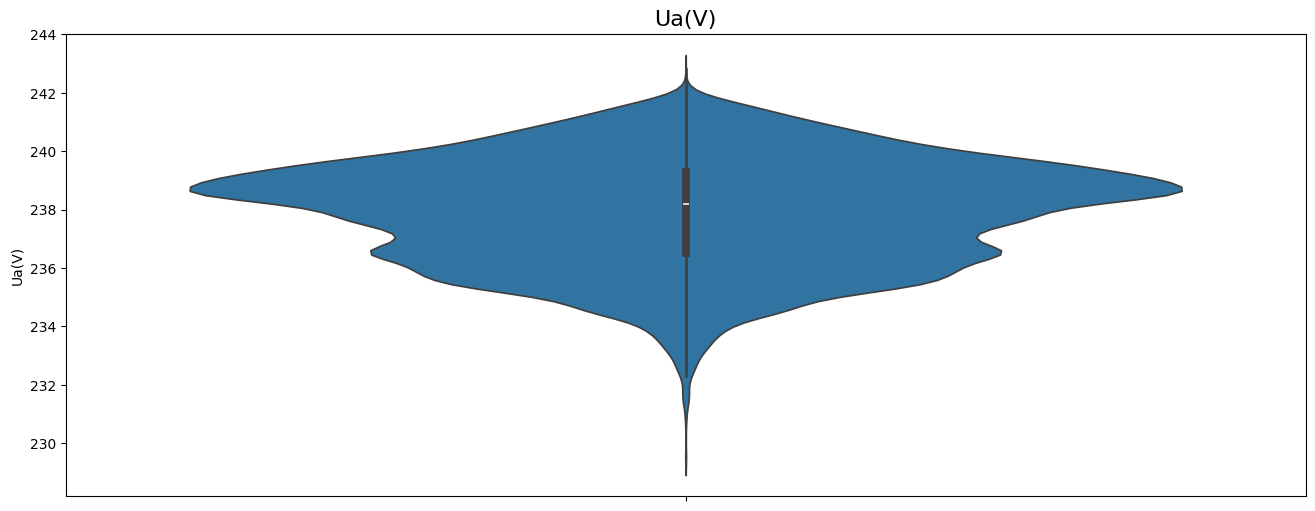

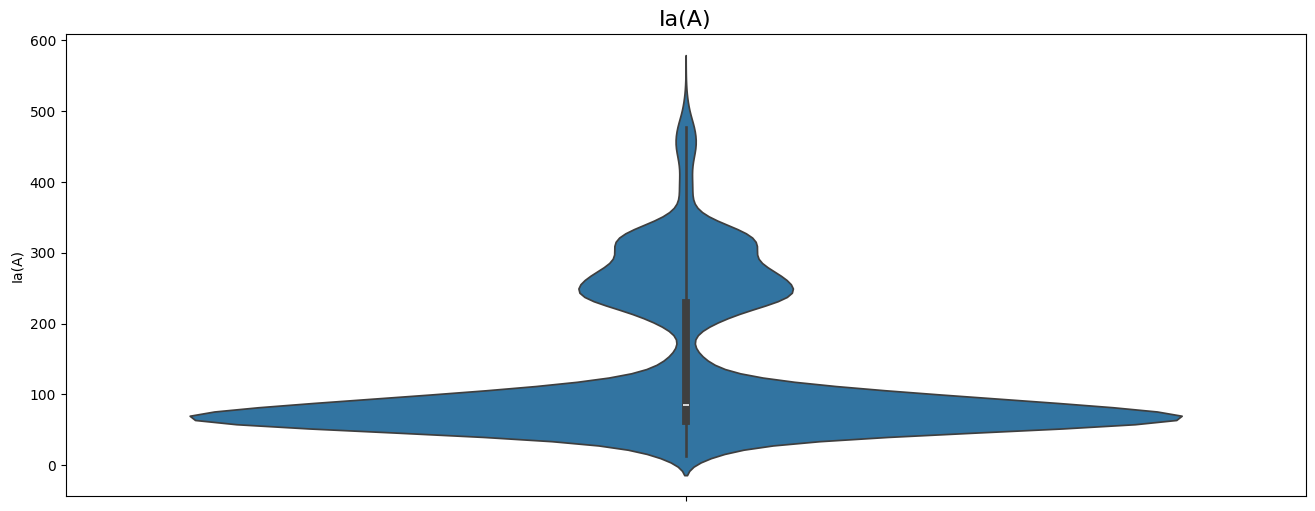

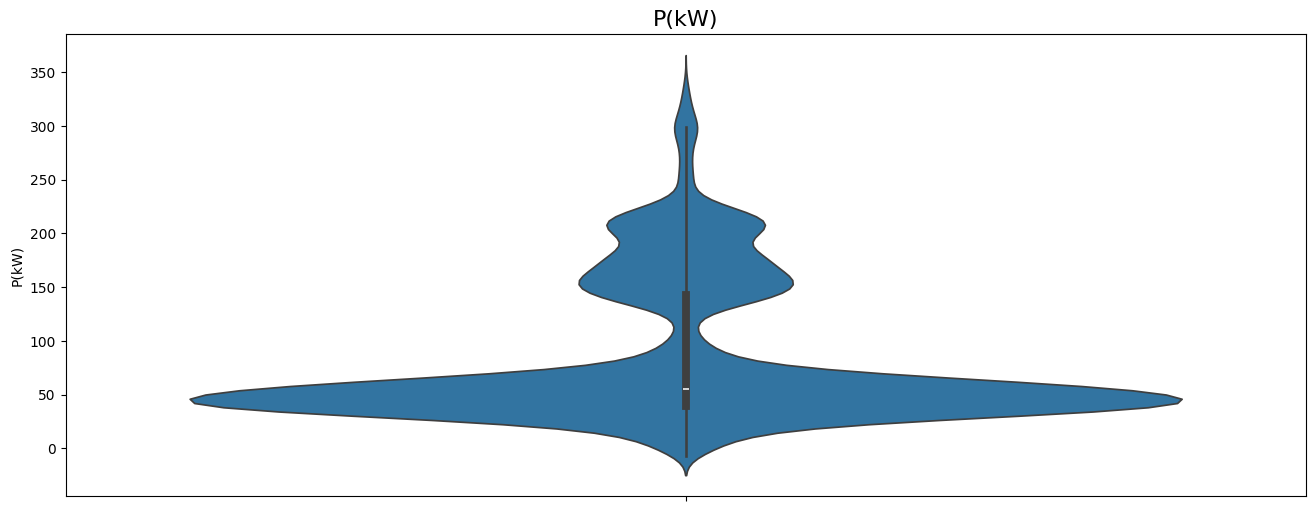

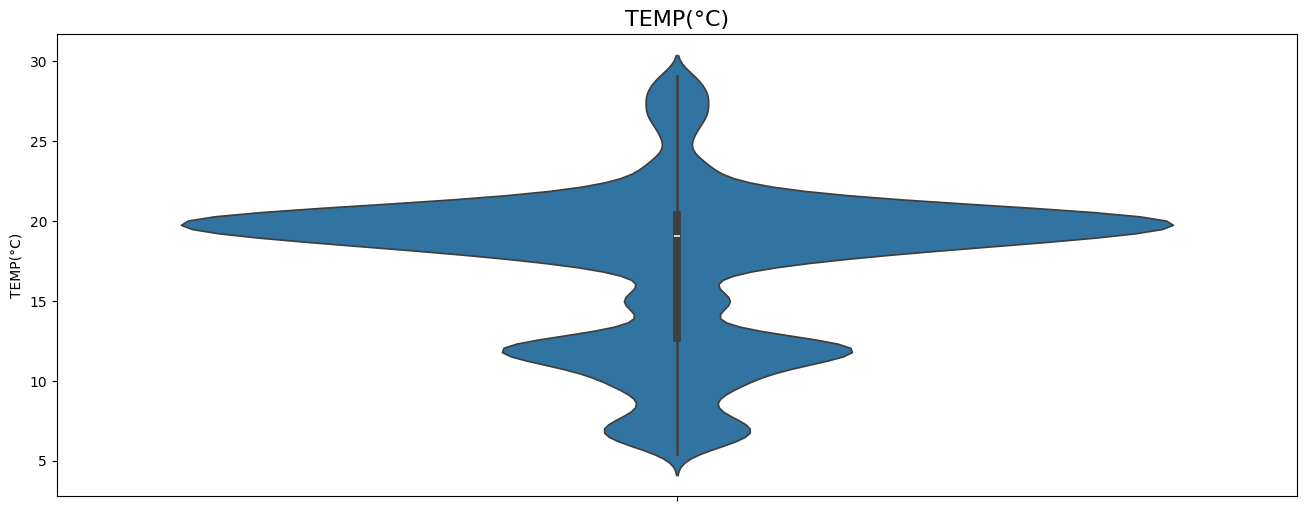

In [ ]:
#grafico a violino
for col in data.columns:
    if col != 'datetime':
        plt.figure(figsize=(16, 6))
        sns.violinplot(data[col])
        plt.title(col, size=16)
        plt.show()

vediamo la distribuzione dei quantili e dei valori

<Figure size 1600x600 with 0 Axes>

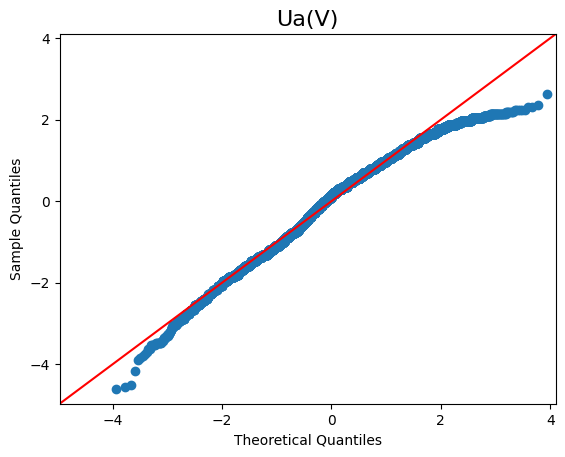

<Figure size 1600x600 with 0 Axes>

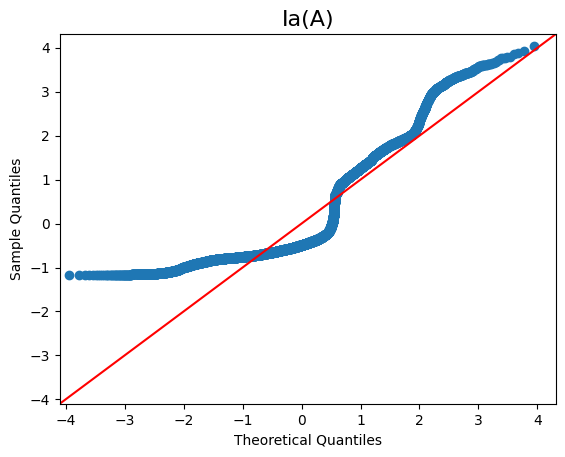

<Figure size 1600x600 with 0 Axes>

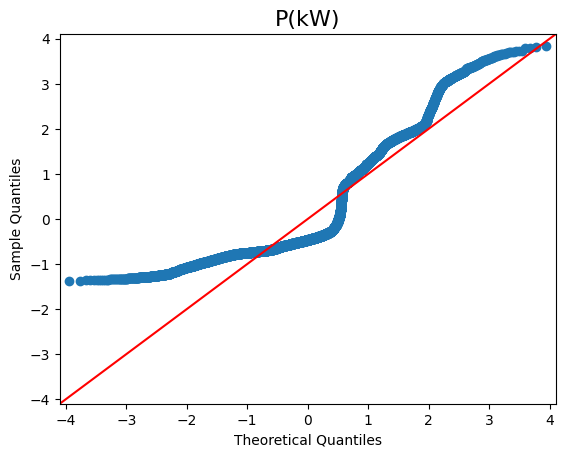

<Figure size 1600x600 with 0 Axes>

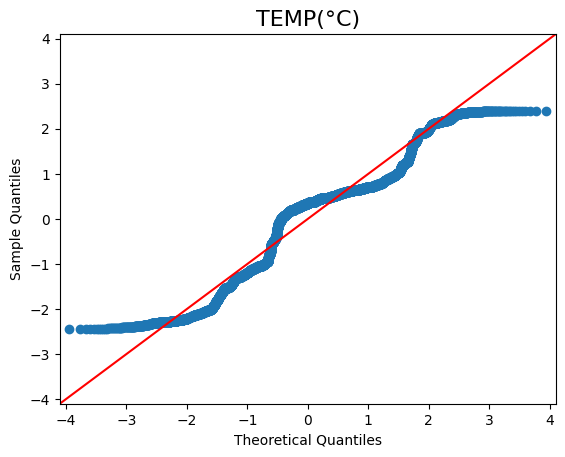

<Figure size 1600x600 with 0 Axes>

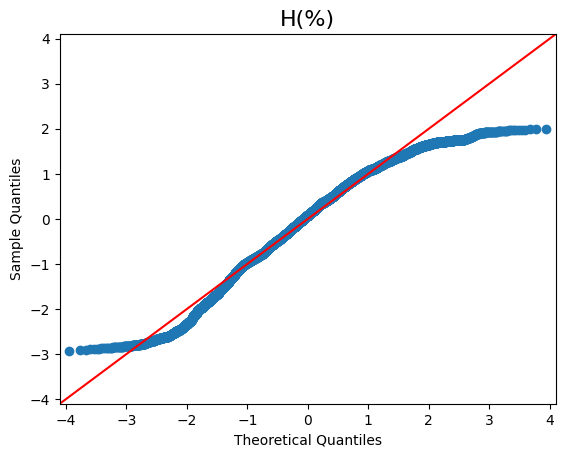

In [ ]:
#vediamo se la distribuzione dei valori delle feautures può essere assimilabile ad un gaussiana

for col in data.columns:
    if col != 'datetime':
        plt.figure(figsize=(16, 6))
        sm.qqplot(data[col], line='45', fit=True)
        plt.title(col, size=16)
        plt.show()

<ipython-input-4-02eb1a9bc270>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['P(kW)'], bins = 20, kde = True)


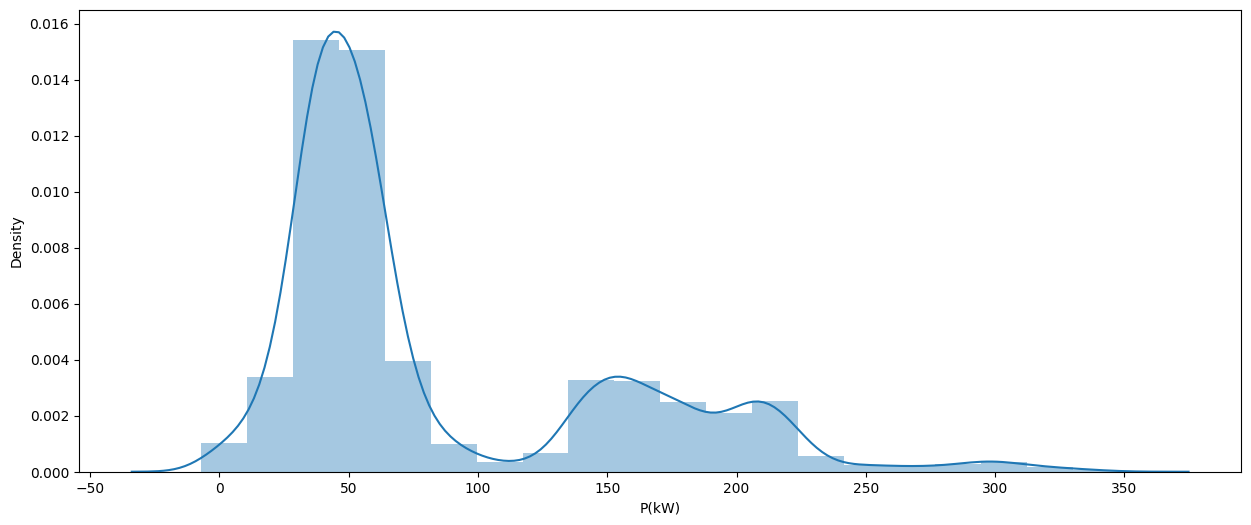

In [ ]:
plt.figure(figsize=(15,6))
sns.distplot(data['P(kW)'], bins = 20, kde = True)
plt.show()

In [ ]:
data.isnull().sum()

datetime    0
Ua(V)       0
Ia(A)       0
P(kW)       0
TEMP(°C)    0
H(%)        0
dtype: int64

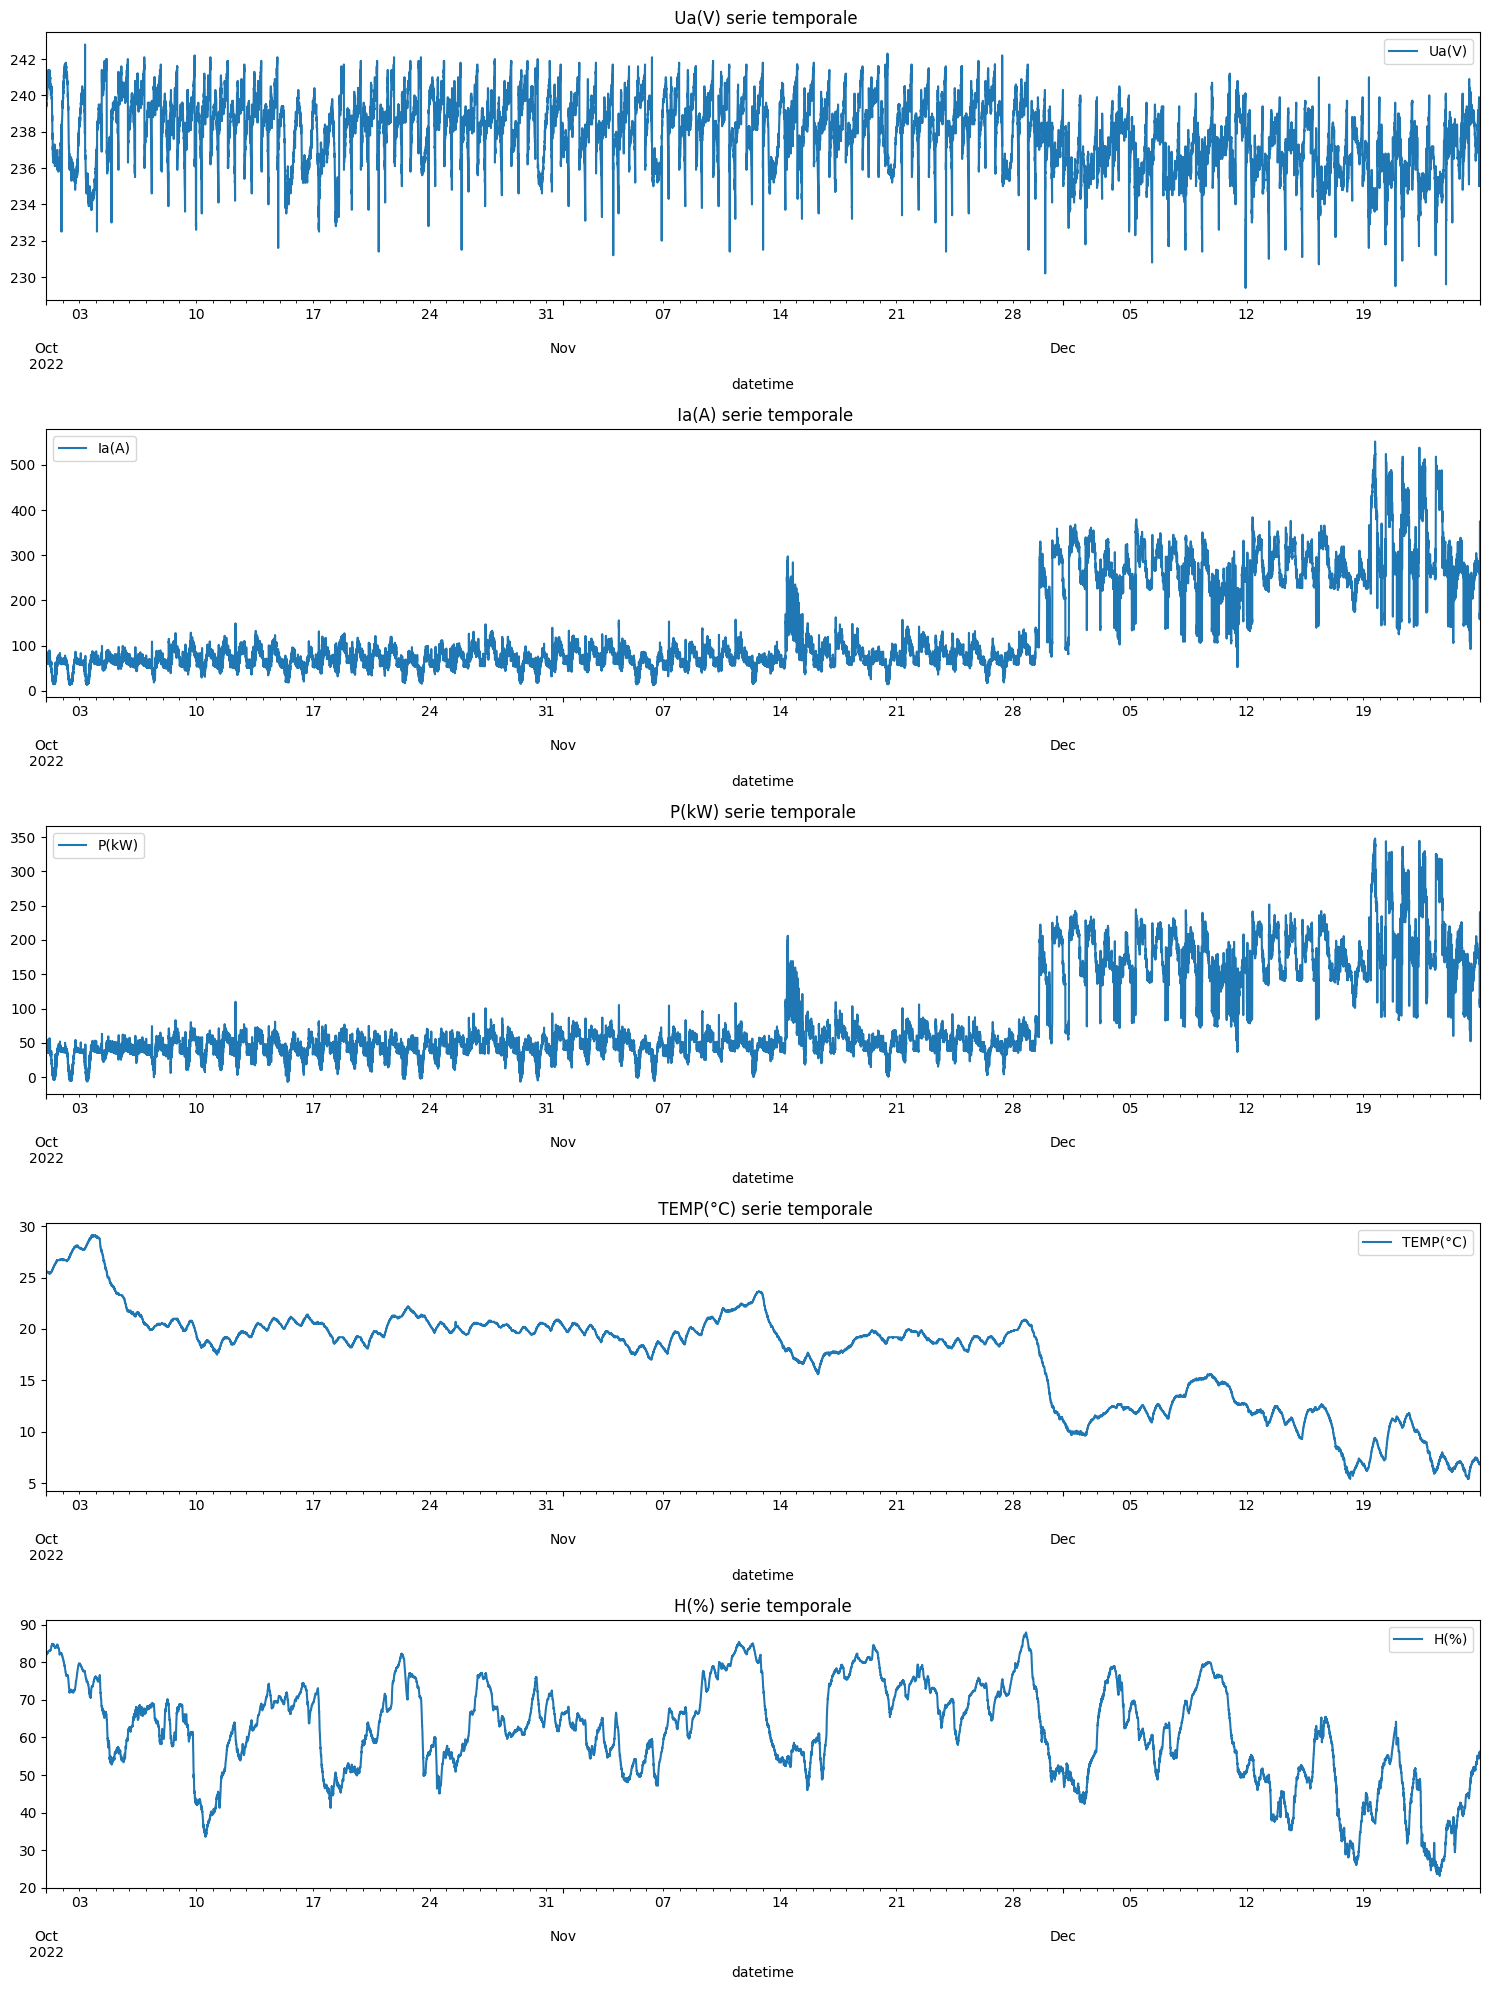

In [ ]:
#vediamo le serie temporali delle features

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15, 20))
data.plot(x='datetime', y='Ua(V)', ax=axes[0], title=" Ua(V) serie temporale")
data.plot(x='datetime', y='Ia(A)', ax=axes[1], title=" Ia(A) serie temporale")
data.plot(x='datetime', y='P(kW)', ax=axes[2], title="P(kW) serie temporale")
data.plot(x='datetime', y='TEMP(°C)', ax=axes[3], title=" TEMP(°C) serie temporale")
data.plot(x='datetime', y='H(%)', ax=axes[4], title="H(%) serie temporale")
plt.tight_layout()
plt.show()

PRE-PROCESSING

In [ ]:
data.isnull().sum()

datetime    0
Ua(V)       0
Ia(A)       0
P(kW)       0
TEMP(°C)    0
H(%)        0
dtype: int64

In [4]:
from sklearn.model_selection import train_test_split

X = data.drop(['P(kW)','datetime','Ia(A)','Ua(V)'], axis = 1)  #tolgo target e tutto quello che non è un dato atmosferico
y = data['P(kW)'] #il target da predirre

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

PREDIZIONE

Vediamo alcuni modelli di regressione applicati

Modello Partial least squares (PLS)

In [5]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score  #queste sono metriche per valutare il modello

# facciamo il training del modello  PLS
pls = PLSRegression()
pls.fit(X_train, y_train)

# predizione e valutazione dei risultati Predict and evaluate on the test set
y_pred = pls.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
pls_score = pls.score(X_test, y_test)
print(f"Score del modello PLS : {pls_score*100:.4f} %")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

Score del modello PLS : 66.4895 %
RMSE: 39.169634303951824
R²: 0.6648952292470864


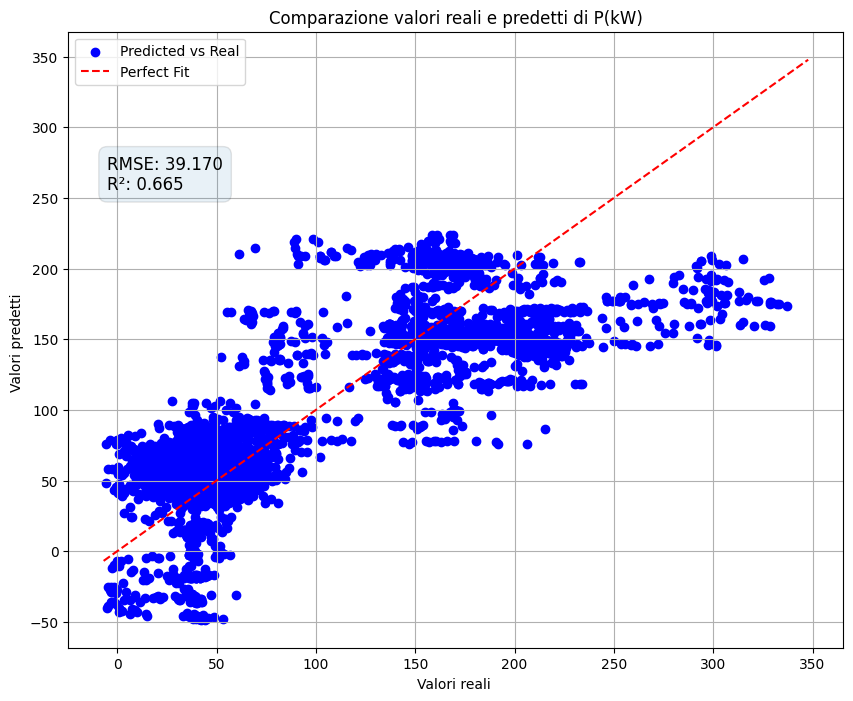

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Real')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', label='Perfect Fit')
plt.text(x=0.05, y=0.8, s=f'RMSE: {rmse:.3f}\nR²: {r2:.3f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', alpha=0.1))

plt.xlabel('Valori reali ')
plt.ylabel('Valori predetti ')
plt.title('Comparazione valori reali e predetti di P(kW)')
plt.legend()
plt.grid(True)
plt.show()

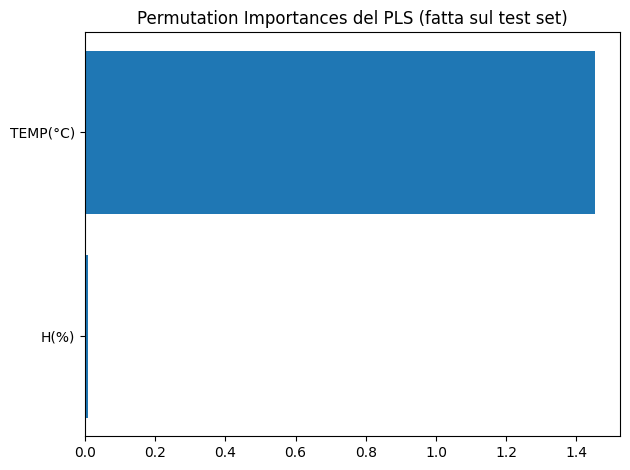

In [6]:
from sklearn.inspection import permutation_importance

#calcolo la feature importance con i test di permutazione
results = permutation_importance(pls, X_train, y_train, scoring='r2', n_jobs=-1)
importance = results.importances_mean  #prende l'importanza
sorted_idx = results.importances_mean.argsort()

#plotto i risultati
fig, ax = plt.subplots()
ax.barh(X.columns[sorted_idx], results.importances[sorted_idx].mean(axis=1).T)
ax.set_title("Permutation Importances del PLS (fatta sul test set)")
fig.tight_layout()
plt.show()

posso sennò stampare solo i numneri


In [ ]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': results.importances_mean
})

# Ordina dalla più importante alla meno importante
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)

    Feature  Importance
0  TEMP(°C)    1.462114
1      H(%)    0.007501


In [ ]:
sorted_idx = results.importances_mean.argsort()[::-1]  # metto in ordine decrescente
for idx in sorted_idx:
    print(f"{X.columns[idx]}: {results.importances_mean[idx]:.4f}")

TEMP(°C): 1.4621
H(%): 0.0075


Modello di regressione lineare

In [18]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

lr_score = lr_model.score(X_test, y_test)
print(f"Score della regressione lineare: {lr_score*100:.4f} %")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

Score della regressione lineare: 66.4895 %
RMSE: 39.169634303951824
R²: 0.6648952292470864


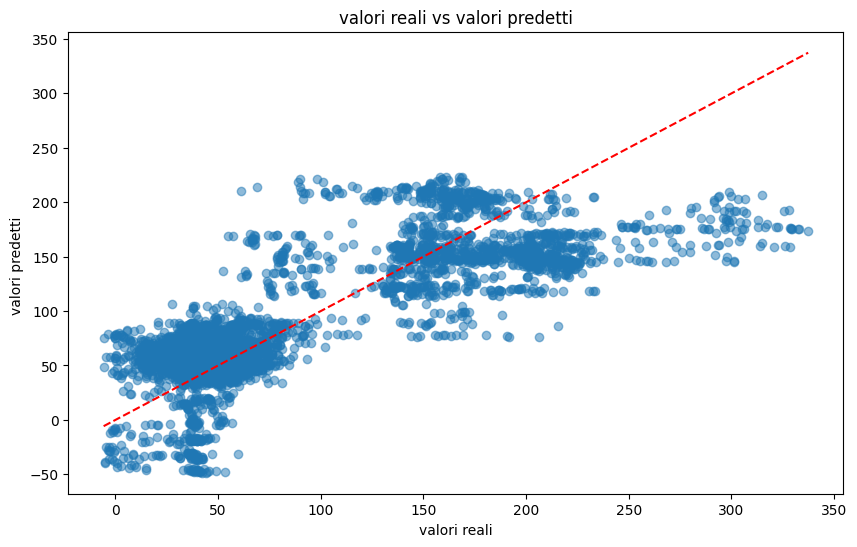

In [ ]:
#  plot per confronto valore reale e predetto

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # linea per la predizione pergetta
plt.xlabel('valori reali')
plt.ylabel('valori predetti ')
plt.title('valori reali vs valori predetti')
plt.show()

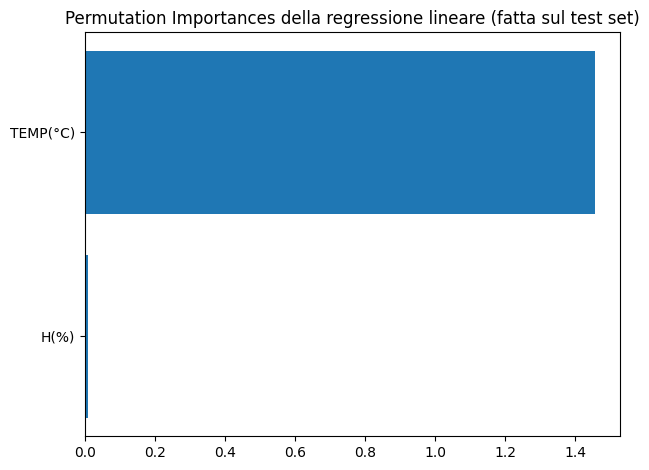

In [19]:
#calcolo la feature importance con i test di permutazione
results = permutation_importance(lr_model, X_train, y_train, scoring='r2', n_jobs=-1)
importance = results.importances_mean  #prende l'importanza
sorted_idx = results.importances_mean.argsort()

#plotto i risultati
fig, ax = plt.subplots()
ax.barh(X.columns[sorted_idx], results.importances[sorted_idx].mean(axis=1).T)
ax.set_title("Permutation Importances della regressione lineare (fatta sul test set)")
fig.tight_layout()
plt.show()

In [20]:
sorted_idx = results.importances_mean.argsort()[::-1]  # metto in ordine decrescente
for idx in sorted_idx:
    print(f"{X.columns[idx]}: {results.importances_mean[idx]:.4f}")

TEMP(°C): 1.4549
H(%): 0.0078


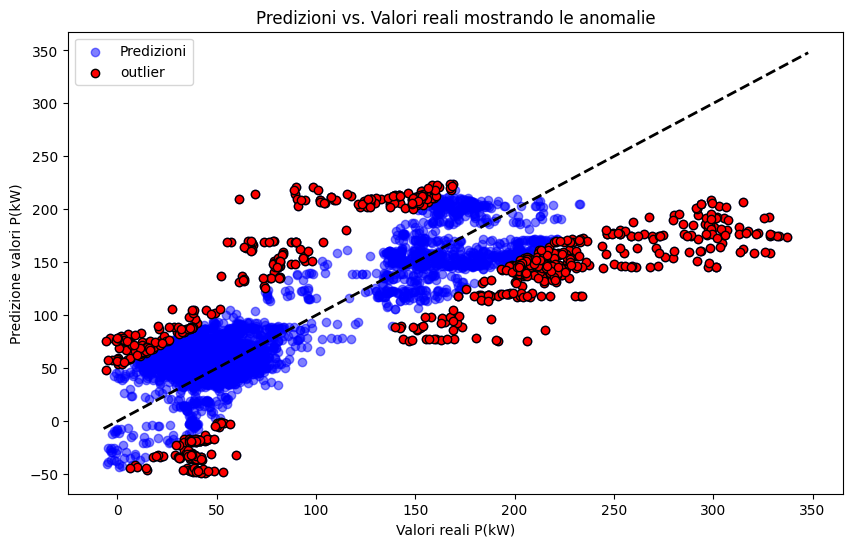

In [ ]:
#imposto una fascia di tolleranza per rilevare le anomalie
tolerance = 50
errors = np.abs(y_test - y_pred)
anomalies = errors > tolerance


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predizioni')
plt.scatter(y_test[anomalies], y_pred[anomalies], color='red', label='outlier', edgecolor='k')
plt.xlabel('Valori reali P(kW)')
plt.ylabel('Predizione valori P(kW)')
plt.title('Predizioni vs. Valori reali mostrando le anomalie')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.legend()
plt.show()

KNN

In [7]:
from sklearn import neighbors

#mi serve per salvarmi i risultati in base al parametro k
score_list = []
n_neighbors_list = []

# uso il ciclo for per vedere il miglior valore del parametro per il modello
for i in range(1, 21):
    knn = neighbors.KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)

    knn_score = knn.score(X_test, y_test)

    score_list.append(knn_score)
    n_neighbors_list.append(i)

best_n_neighbor = n_neighbors_list[score_list.index(max(score_list))]
print(f"Miglior risultato del knn è con parametro  {best_n_neighbor} e vale  {max(score_list)*100:.4f} %")

Miglior risultato del knn è con parametro  4 e vale  91.6346 %


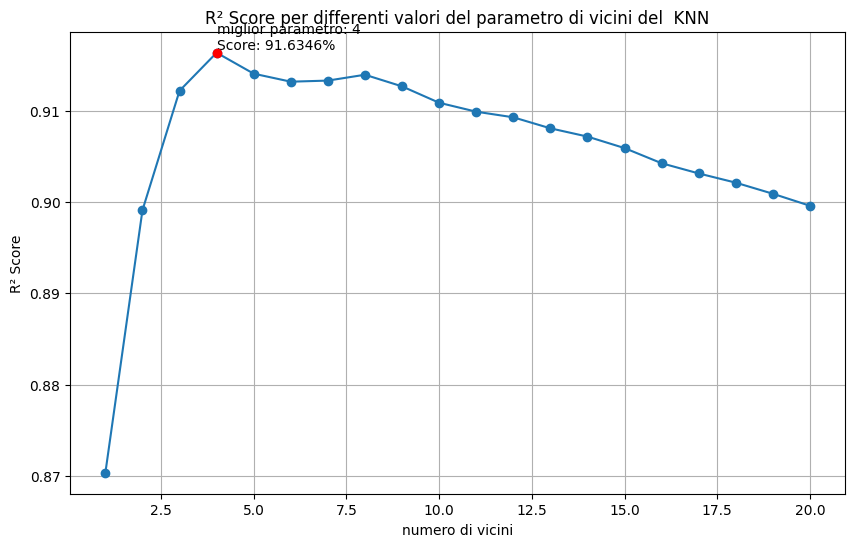

miglior risultato è 91.6346 in corrispondenza di  4 come parametro %


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_list, score_list, marker='o')
plt.xlabel('numero di vicini')
plt.ylabel('R² Score')
plt.title('R² Score per differenti valori del parametro di vicini del  KNN')
plt.grid(True)

# Highlight the best n_neighbors
best_n_neighbor = n_neighbors_list[score_list.index(max(score_list))]
best_score = max(score_list)
plt.scatter([best_n_neighbor], [best_score], color='red', zorder=5)
plt.text(best_n_neighbor, best_score, f'miglior parametro: {best_n_neighbor}\nScore: {best_score*100:.4f}%',
         horizontalalignment='left', verticalalignment='bottom')

plt.show()

print(f"miglior risultato è {best_score*100:.4f} in corrispondenza di  {best_n_neighbor} come parametro %")

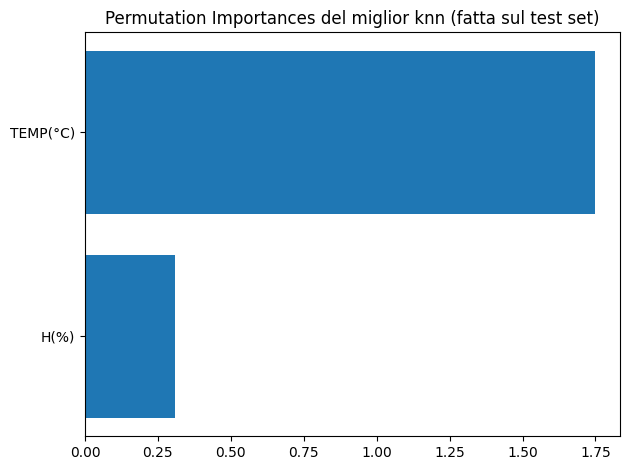

In [8]:
best_knn = neighbors.KNeighborsRegressor(n_neighbors=4)
best_knn.fit(X_train, y_train)

#calcolo la feature importance con i test di permutazione
results = permutation_importance(best_knn, X_train, y_train, scoring='r2', n_jobs=-1)
importance = results.importances_mean  #prende l'importanza
sorted_idx = results.importances_mean.argsort()

#plotto i risultati
fig, ax = plt.subplots()
ax.barh(X.columns[sorted_idx], results.importances[sorted_idx].mean(axis=1).T)
ax.set_title("Permutation Importances del miglior knn (fatta sul test set)")
fig.tight_layout()
plt.show()

In [9]:
sorted_idx = results.importances_mean.argsort()[::-1]  # metto in ordine decrescente
for idx in sorted_idx:
    print(f"{X.columns[idx]}: {results.importances_mean[idx]:.4f}")

TEMP(°C): 1.7467
H(%): 0.3088


Alberi decisonali

In [10]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

y_pred = dtr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

dtr_score = dtr.score(X_test, y_test)
print(f"Score dell'albero: {dtr_score*100:.4f} %")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

Score dell'albero: 89.5216 %
RMSE: 21.90315943490252
R²: 0.8952159679722271


Text(0.5, 1.0, ' feautures importance dell albero decisionale è  ')

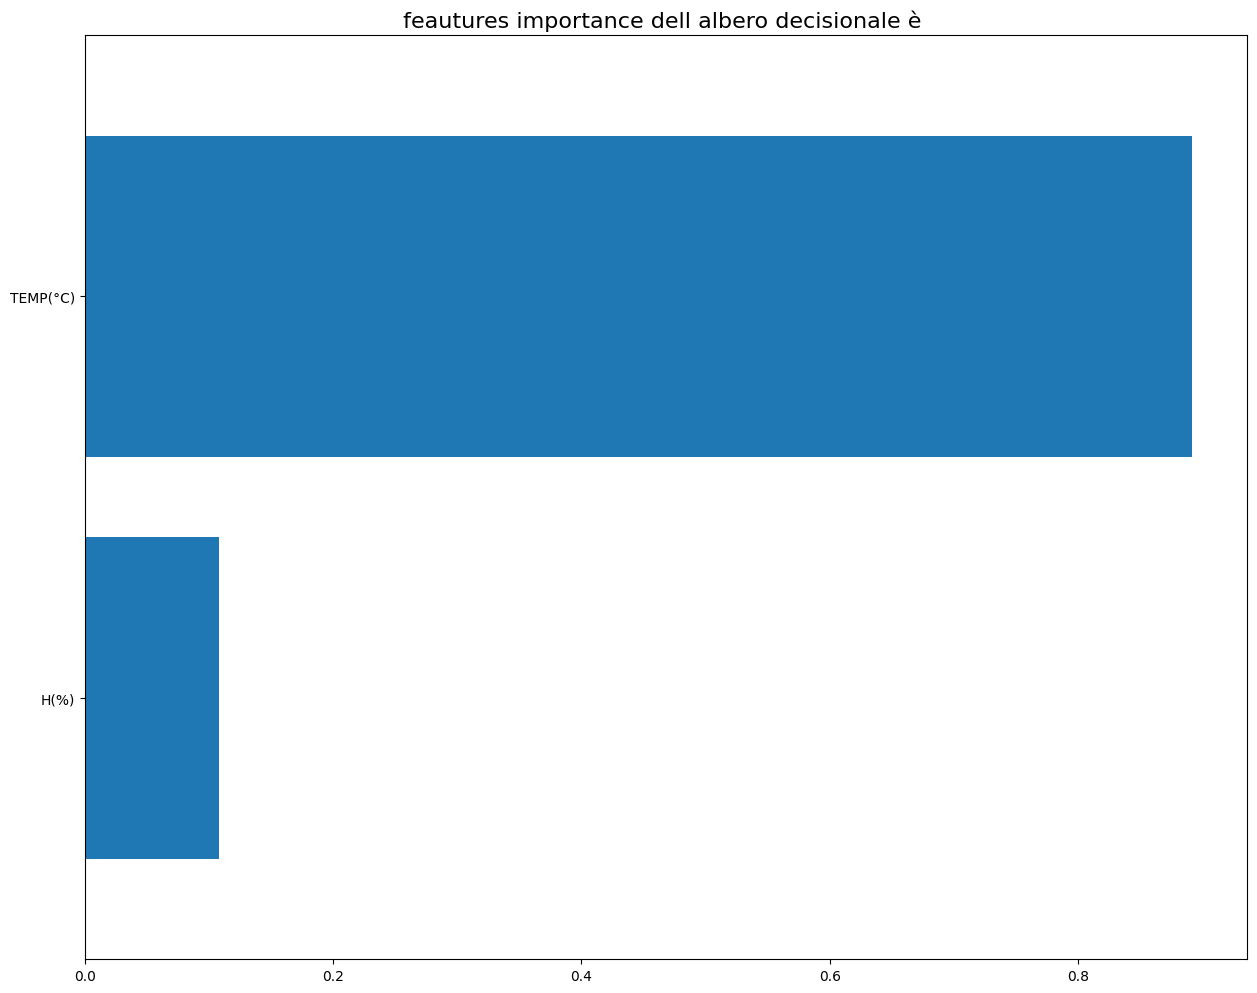

In [ ]:
#stampo la feature importance che per gli alberi è una proprietà che posso ricavare senza test di permutazione
plt.figure(figsize=(15,12))
pd.Series(dtr.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8)
plt.title(' feautures importance dell albero decisionale è  ', size=16)

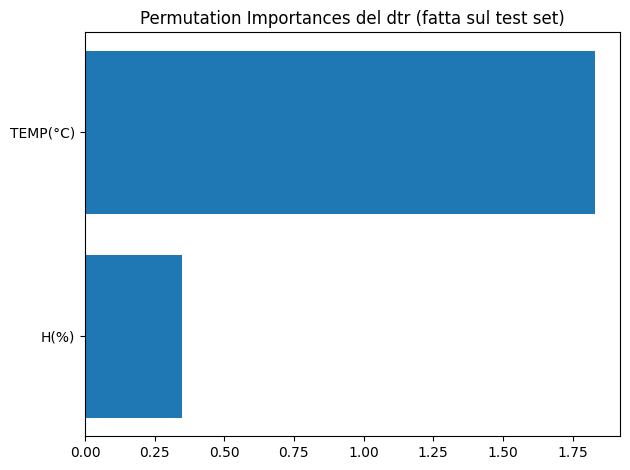

In [16]:
#calcolo la feature importance con i test di permutazione
results = permutation_importance(dtr, X_train, y_train, scoring='r2', n_jobs=-1)
importance = results.importances_mean  #prende l'importanza
sorted_idx = results.importances_mean.argsort()

#plotto i risultati
fig, ax = plt.subplots()
ax.barh(X.columns[sorted_idx], results.importances[sorted_idx].mean(axis=1).T)
ax.set_title("Permutation Importances del dtr (fatta sul test set)")
fig.tight_layout()
plt.show()

In [17]:
sorted_idx = results.importances_mean.argsort()[::-1]  # metto in ordine decrescente
for idx in sorted_idx:
    print(f"{X.columns[idx]}: {results.importances_mean[idx]:.4f}")

TEMP(°C): 1.8290
H(%): 0.3495


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

y_pred = rfr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

rfr_score = rfr.score(X_test, y_test)
print(f"Score del random forest: {rfr_score*100:.4f} %")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


Score del random forest: 91.8615 %
RMSE: 19.303257542999813
R²: 0.9186152962290702


Text(0.5, 1.0, ' feautures importance del random forest  è  ')

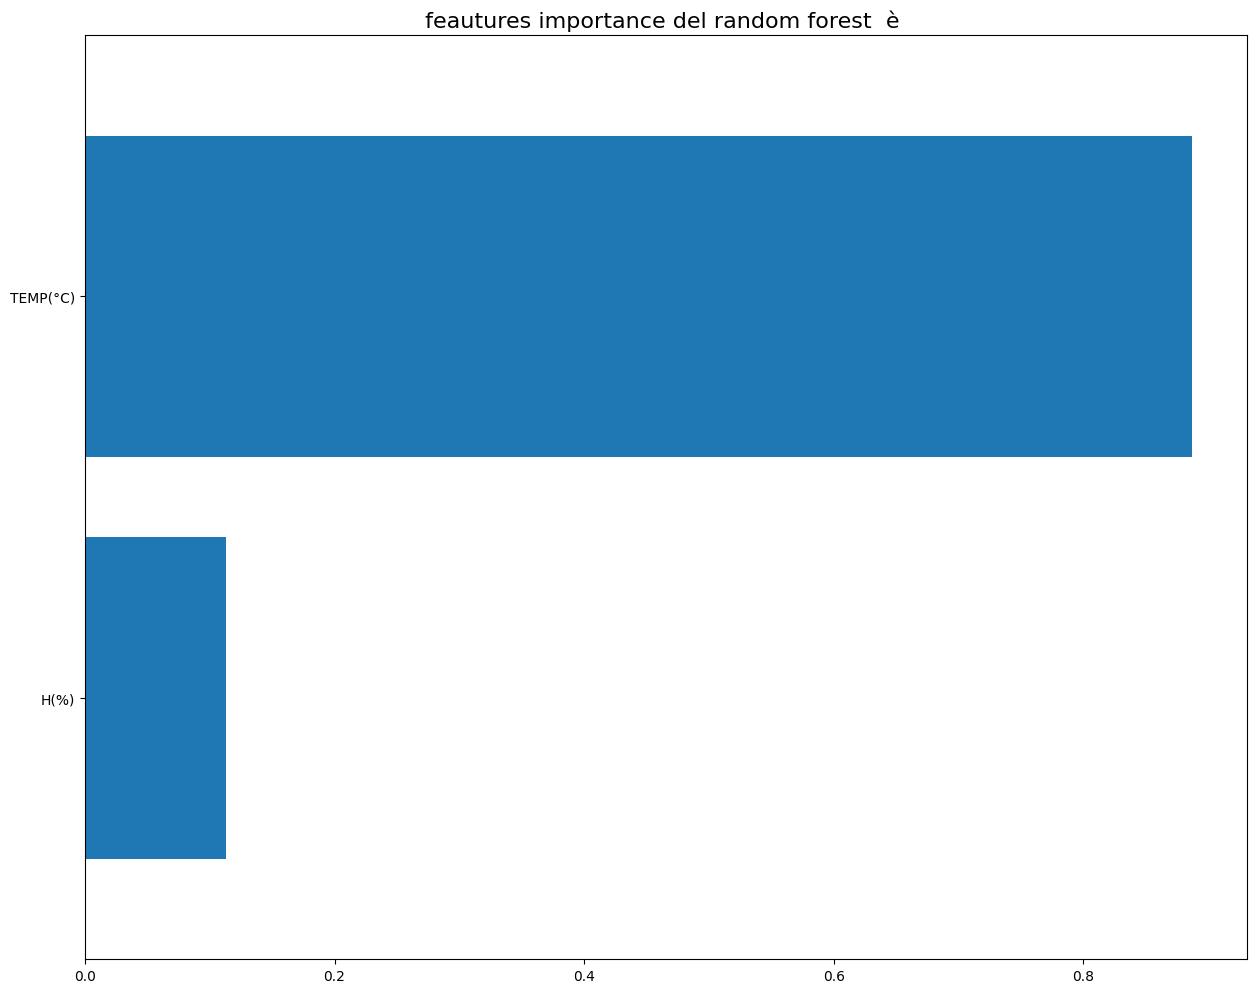

In [ ]:
plt.figure(figsize=(15,12))
pd.Series(rfr.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8)
plt.title(' feautures importance del random forest  è  ', size=16)

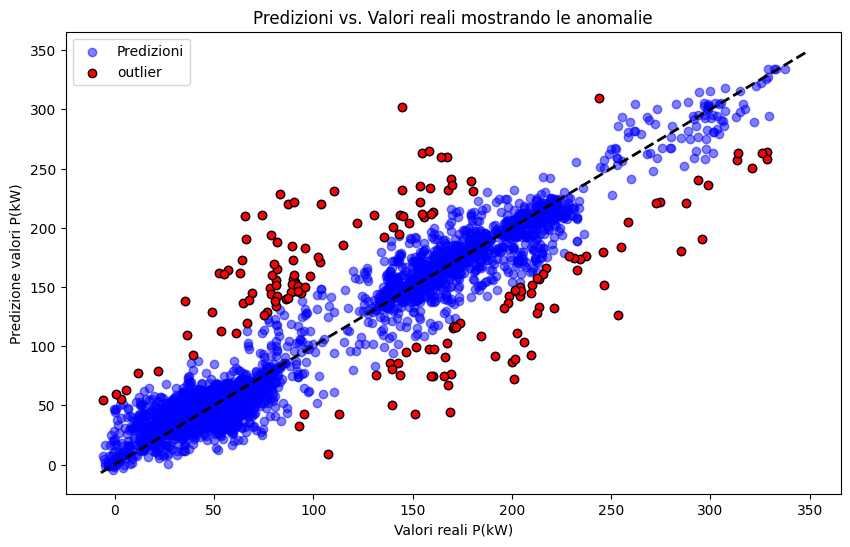

In [ ]:
tolerance = 50
errors = np.abs(y_test - y_pred)
anomalies = errors > tolerance


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predizioni')
plt.scatter(y_test[anomalies], y_pred[anomalies], color='red', label='outlier', edgecolor='k')
plt.xlabel('Valori reali P(kW)')
plt.ylabel('Predizione valori P(kW)')
plt.title('Predizioni vs. Valori reali mostrando le anomalie')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.legend()
plt.show()

Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# dichiarazione e trainingraining del modello
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(X_train, y_train)

# valutazione del  modello
y_pred = gb_regressor.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
gb_score = gb_regressor.score(X_test, y_test)


print(f"Score del gradient boost: {gb_score*100:.4f} %")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

Score del gradient boost: 86.4496 %
RMSE: 24.907797585737296
R²: 0.8644959635152496


Text(0.5, 1.0, ' feautures importance del gradient boost  è  ')

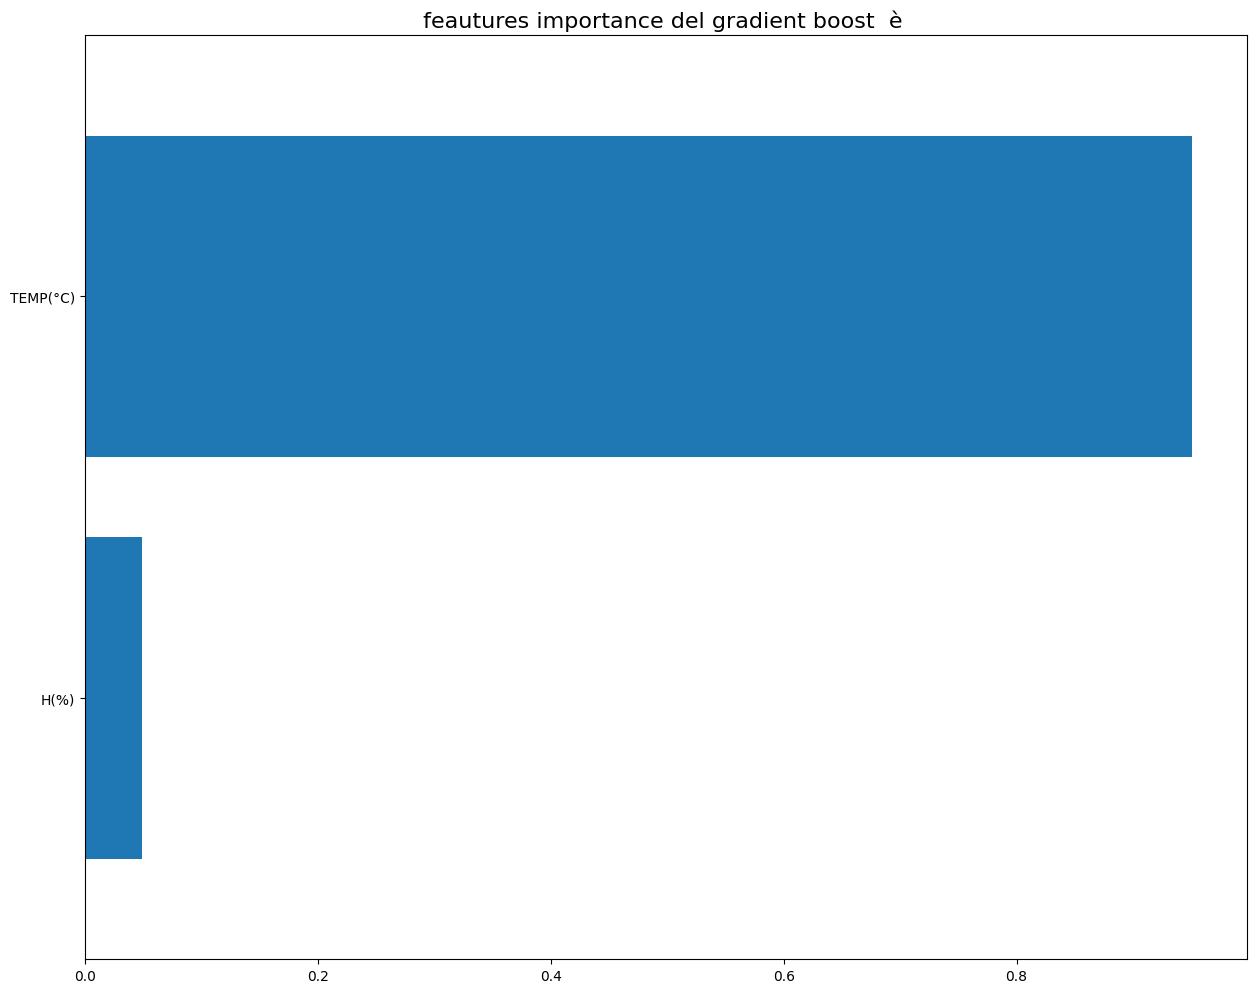

In [ ]:
plt.figure(figsize=(15,12))
pd.Series(gb_regressor.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8)
plt.title(' feautures importance del gradient boost  è  ', size=16)

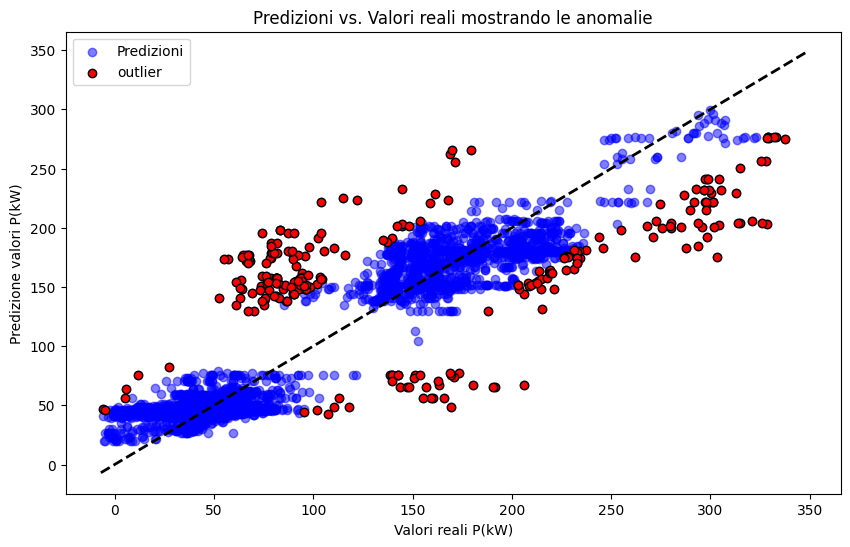

In [ ]:
tolerance = 50
errors = np.abs(y_test - y_pred)
anomalies = errors > tolerance


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predizioni')
plt.scatter(y_test[anomalies], y_pred[anomalies], color='red', label='outlier', edgecolor='k')
plt.xlabel('Valori reali P(kW)')
plt.ylabel('Predizione valori P(kW)')
plt.title('Predizioni vs. Valori reali mostrando le anomalie')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.legend()
plt.show()

MLPRegressor

E' un multi layer perceptron , ovvero una rete neurale

In [21]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor()
mlp.fit(X_train,y_train)

y_pred = mlp.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

mlp_score =mlp.score(X_test, y_test)
print(f"Score MLPRegressor: {mlp_score*100:.4f} %")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

Score MLPRegressor: 80.4038 %
RMSE: 29.953370065267706
R²: 0.8040375045872136


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


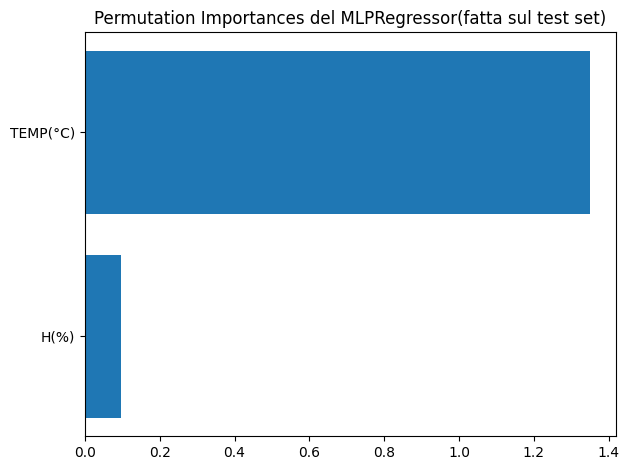

In [22]:
#calcolo la feature importance con i test di permutazione
results = permutation_importance(mlp, X_train, y_train, scoring='r2', n_jobs=-1)
importance = results.importances_mean  #prende l'importanza
sorted_idx = results.importances_mean.argsort()

#plotto i risultati
fig, ax = plt.subplots()
ax.barh(X.columns[sorted_idx], results.importances[sorted_idx].mean(axis=1).T)
ax.set_title("Permutation Importances del MLPRegressor(fatta sul test set)")
fig.tight_layout()
plt.show()

In [23]:
sorted_idx = results.importances_mean.argsort()[::-1]  # metto in ordine decrescente
for idx in sorted_idx:
    print(f"{X.columns[idx]}: {results.importances_mean[idx]:.4f}")

TEMP(°C): 1.3518
H(%): 0.0972


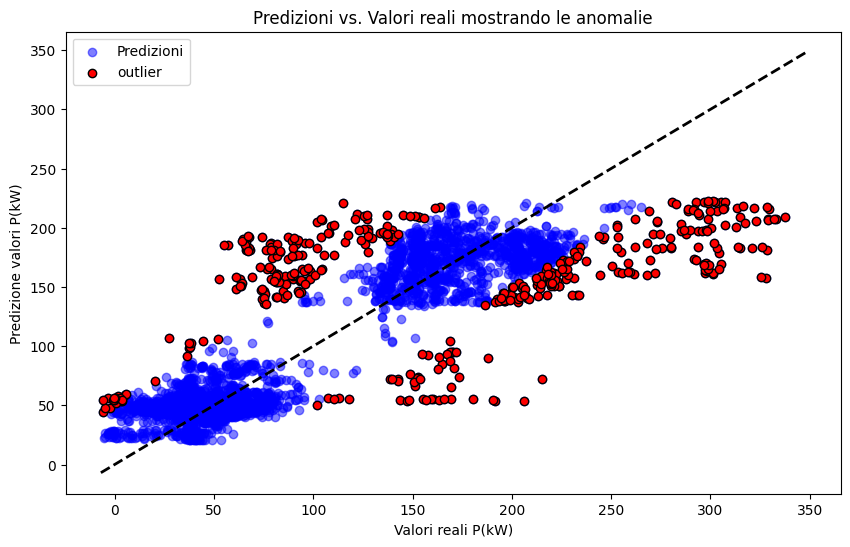

In [ ]:
tolerance = 50
errors = np.abs(y_test - y_pred)
anomalies = errors > tolerance


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predizioni')
plt.scatter(y_test[anomalies], y_pred[anomalies], color='red', label='outlier', edgecolor='k')
plt.xlabel('Valori reali P(kW)')
plt.ylabel('Predizione valori P(kW)')
plt.title('Predizioni vs. Valori reali mostrando le anomalie')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.legend()
plt.show()

Bayesian Ridge Regression

In [ ]:
from sklearn import linear_model

br = linear_model.BayesianRidge()
br.fit(X_train,y_train)

y_pred = br.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

br_score =br.score(X_test, y_test)
print(f"Score bayesian ridge regression: {br_score*100:.4f} %")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

Score bayesian ridge regression: 66.4896 %
RMSE: 39.16960031255932
R²: 0.6648958108543979


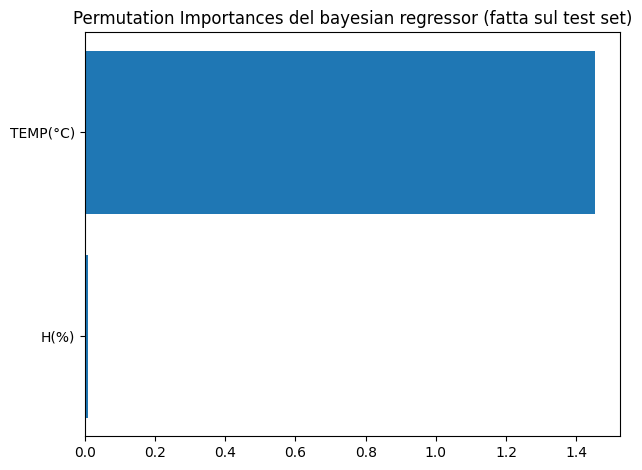

In [ ]:
#calcolo la feature importance con i test di permutazione
results = permutation_importance(br, X_train, y_train, scoring='r2', n_jobs=-1)
importance = results.importances_mean  #prende l'importanza
sorted_idx = results.importances_mean.argsort()

#plotto i risultati
fig, ax = plt.subplots()
ax.barh(X.columns[sorted_idx], results.importances[sorted_idx].mean(axis=1).T)
ax.set_title("Permutation Importances del bayesian regressor (fatta sul test set)")
fig.tight_layout()
plt.show()

Comparazione dei modelli

Dai modelli precedenti prendiamo i risultati e li compariamo con un grafico

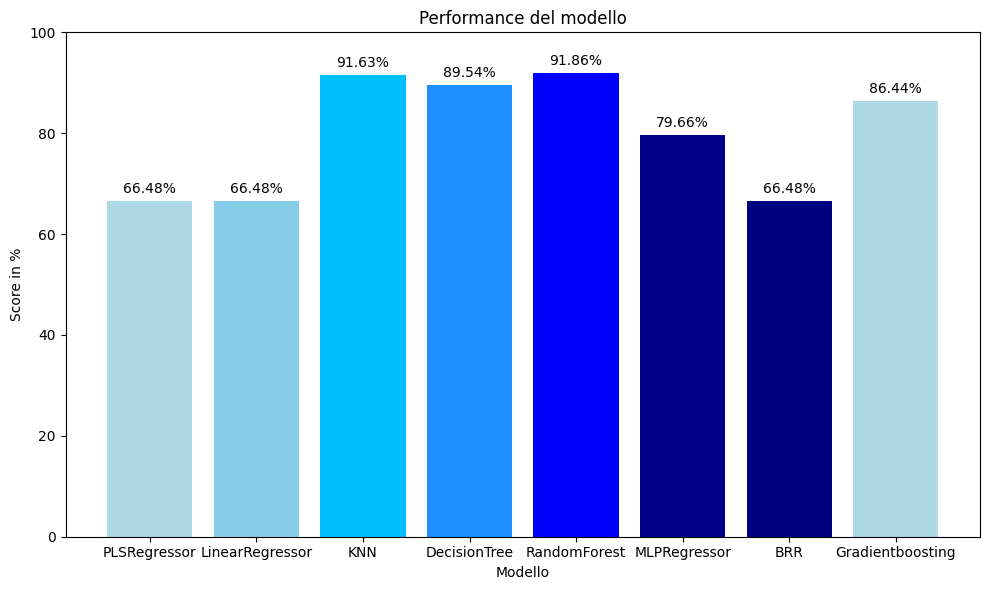

In [ ]:
models = ['PLSRegressor', 'LinearRegressor','KNN','DecisionTree', 'RandomForest','MLPRegressor','BRR','Gradientboosting']

# scores corrispettivi dei modelli precedentemente utilizzati ed elencati
scores = [66.48,66.48,91.63,89.54,91.86,79.66,66.48,86.44]

# Creazione di un bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, scores, color = ['lightblue', 'skyblue', 'deepskyblue', 'dodgerblue','blue','darkblue','navy'])
plt.ylim(0, 100)  # metto asse y settato tra 0 e 100
plt.title('Performance del modello')
plt.xlabel('Modello')
plt.ylabel('Score in %')

# metto gli socres in alto sopra le barre del grafico
for i, score in enumerate(scores):
    plt.text(i, score + 1, f"{score:.2f}%", ha='center', va='bottom')

# mostra il grafico
plt.tight_layout()
plt.show()